In [2]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [3]:
import os
from pathlib import Path

base_path = Path("..")
dataset_path = base_path / "dataset"
kitti_labels_path = base_path / "kitti_labels"
models_path = base_path / "models"
results_path = base_path / "results"

images_train_path = dataset_path / "train" / "images"
images_test_path = dataset_path / "test" / "images"
images_val_path = dataset_path / "val" / "images"

labels_train_path = dataset_path / "train" / "labels"
labels_val_path = dataset_path / "val" / "labels"

kitti_labels_train_path = kitti_labels_path / "train"
kitti_labels_val_path = kitti_labels_path / "val"

print("Dataset Path exists:", os.path.exists(dataset_path))
print("KITTI Labels Path exists:", os.path.exists(kitti_labels_path))
print("Models Path exists:", os.path.exists(models_path))
print("Results Path exists:", os.path.exists(results_path))
print("")
print("Images Train Path exists:", os.path.exists(images_train_path))
print("Images Test Path exists:", os.path.exists(images_test_path))
print("Images Val Path exists:", os.path.exists(images_val_path))
print("")
print("Labels Train Path exists:", os.path.exists(labels_train_path))
print("Labels Val Path exists:", os.path.exists(labels_val_path))
print("")
print("KITTI Labels Train Path exists:", os.path.exists(kitti_labels_train_path))
print("KITTI Labels Val Path exists:", os.path.exists(kitti_labels_val_path))

Dataset Path exists: True
KITTI Labels Path exists: True
Models Path exists: False
Results Path exists: True

Images Train Path exists: True
Images Test Path exists: True
Images Val Path exists: True

Labels Train Path exists: True
Labels Val Path exists: True

KITTI Labels Train Path exists: True
KITTI Labels Val Path exists: True


In [4]:
num_images_train = len([f for f in os.listdir(images_train_path) if f.endswith('.png')])
num_images_test = len([f for f in os.listdir(images_test_path) if f.endswith('.png')])
num_images_val = len([f for f in os.listdir(images_val_path) if f.endswith('.png')])

num_labels_train = len([f for f in os.listdir(labels_train_path) if f.endswith('.txt')])
num_labels_val = len([f for f in os.listdir(labels_val_path) if f.endswith('.txt')])

num_kitti_labels_train = len([f for f in os.listdir(kitti_labels_train_path) if f.endswith('.txt')])
num_kitti_labels_val = len([f for f in os.listdir(kitti_labels_val_path) if f.endswith('.txt')])

print(f"Number of images (.png) in train: {num_images_train}")
print(f"Number of images (.png) in test: {num_images_test}")
print(f"Number of images (.png) in val: {num_images_val}")
print("")
print(f"Number of label files (.txt) in train: {num_labels_train}")
print(f"Number of label files (.txt) in val: {num_labels_val}")
print("")
print(f"Number of KITTI label files (.txt) in train: {num_kitti_labels_train}")
print(f"Number of KITTI label files (.txt) in val: {num_kitti_labels_val}")

Number of images (.png) in train: 7000
Number of images (.png) in test: 7518
Number of images (.png) in val: 481

Number of label files (.txt) in train: 7000
Number of label files (.txt) in val: 481

Number of KITTI label files (.txt) in train: 7000
Number of KITTI label files (.txt) in val: 481


Class ID 0: Vehicle
Class ID 0: Vehicle
Class ID 0: Vehicle
Class ID 0: Vehicle
Class ID 0: Vehicle
Class ID 0: Vehicle
Class ID 0: Vehicle
Class ID 0: Vehicle


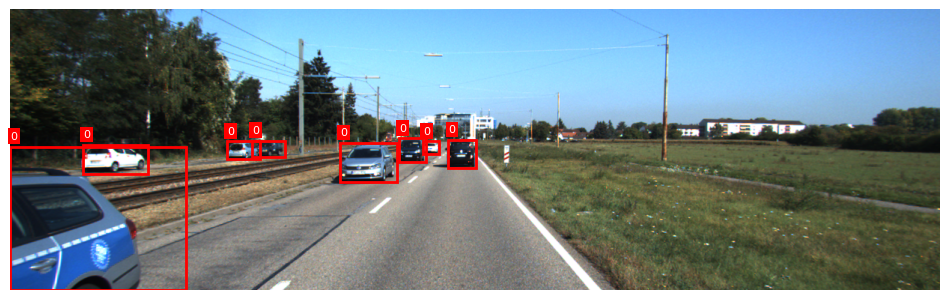

In [5]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

yolo_classes = ['Vehicle', 'Pedestrian', 'Cyclist', 'Misc', 'DontCare']

# Example image and corresponding label file
image_file = images_train_path / "006567.png"
label_file = labels_train_path / "006567.txt"

# Load the image
image = Image.open(image_file)
image_width, image_height = image.size

# Create a plot with a larger figure size
fig, ax = plt.subplots(1, figsize=(12, 8))  # Adjust size as needed
ax.imshow(image)

# Turn off the grid and axis
ax.axis('off')

# Read and parse the label file
with open(label_file, 'r') as f:
    for line in f:
        # YOLO label format: class_id x_center y_center width height (all normalized)
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])

        # Denormalize the coordinates
        x_center *= image_width
        y_center *= image_height
        width *= image_width
        height *= image_height

        # Calculate the bounding box coordinates
        xmin = int(x_center - width / 2)
        ymin = int(y_center - height / 2)
        xmax = int(x_center + width / 2)
        ymax = int(y_center + height / 2)

        # Draw the bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Print the class name in the terminal
        print(f"Class ID {class_id}: {yolo_classes[class_id]}")

        # Annotate the class number on the image
        ax.text(xmin, ymin - 10, str(class_id), color='white', fontsize=8,
                bbox=dict(facecolor='red', edgecolor='none', pad=2))

# Display the image with bounding boxes
plt.show()

In [5]:
from ultralytics import YOLO

model = YOLO("yolov9t.pt")

In [6]:
model.info()

YOLOv9t summary: 917 layers, 2,128,720 parameters, 0 gradients, 8.5 GFLOPs


(917, 2128720, 0, 8.4827648)

In [7]:
import torch
torch.cuda.set_per_process_memory_fraction(0.4, 0)
torch.cuda.empty_cache()
total_memory = torch.cuda.get_device_properties(0).total_memory

In [8]:
torch.cuda.empty_cache()

In [9]:
results = model.train(data = 'data.yaml', epochs = 100, batch = 8, imgsz = 640)

Ultralytics YOLOv8.2.79  Python-3.12.4 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov9t.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

C:\Users\Ryuga\miniconda3\envs\torch-env\Lib\site-packages\ultralytics\engine\trainer.py:271: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\Ryuga\Desktop\Collision Avoidance\Collision-Avoidance\dataset\train\labels.cache... 7000 image
val: Scanning C:\Users\Ryuga\Desktop\Collision Avoidance\Collision-Avoidance\dataset\val\labels.cache... 481 images, 0 


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.56G      1.497      1.676       1.16         81        640: 100%|██████████| 875/875 [05:31<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05


                   all        481       3087      0.443      0.344      0.352      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.59G      1.421      1.227      1.126        112        640: 100%|██████████| 875/875 [04:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.422      0.388      0.384      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.66G      1.437      1.171      1.141        158        640: 100%|██████████| 875/875 [04:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087       0.42      0.409      0.402      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.59G      1.437      1.115      1.149        135        640: 100%|██████████| 875/875 [04:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.502       0.37      0.418      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.63G      1.383      1.022       1.13        112        640: 100%|██████████| 875/875 [04:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.553        0.4      0.451      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.61G      1.343     0.9628      1.119        101        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.547      0.406      0.464      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.65G      1.323     0.9311      1.111        111        640: 100%|██████████| 875/875 [05:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.491      0.457      0.467      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.61G      1.299      0.895        1.1        106        640: 100%|██████████| 875/875 [05:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.647      0.433      0.527      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.65G      1.276     0.8706      1.092         90        640: 100%|██████████| 875/875 [05:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087      0.642      0.465      0.542      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       1.6G       1.26     0.8565      1.088         93        640: 100%|██████████| 875/875 [05:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.562      0.519      0.551      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.55G      1.237     0.8351      1.077         88        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.537      0.523      0.546      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.65G      1.231     0.8238      1.071        130        640: 100%|██████████| 875/875 [05:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.593      0.502      0.543      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.61G      1.213     0.8049      1.067        128        640: 100%|██████████| 875/875 [04:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.586      0.522      0.552      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.59G      1.201     0.7936      1.064         69        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.578      0.555      0.572      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.52G      1.196     0.7843      1.059         93        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.628      0.531      0.579      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.61G      1.183     0.7758      1.054        106        640: 100%|██████████| 875/875 [05:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087       0.67      0.514      0.582       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.61G      1.172     0.7623      1.048        107        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087       0.63      0.558      0.606       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       1.6G      1.163     0.7597      1.048        114        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.664      0.569      0.619      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.71G       1.16      0.752      1.045         46        640: 100%|██████████| 875/875 [05:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.635      0.582      0.623       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.58G      1.147     0.7407      1.041         60        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.626      0.585      0.621      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.57G      1.142     0.7319      1.037        110        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.656       0.58      0.619       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.44G      1.123     0.7175       1.03        179        640: 100%|██████████| 875/875 [05:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087       0.67       0.57      0.623      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       1.6G      1.129     0.7199      1.032         79        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087       0.65      0.602      0.652      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.71G      1.117     0.7099      1.027        101        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.688      0.594      0.653      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.56G      1.118     0.7131      1.027        144        640: 100%|██████████| 875/875 [05:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.651      0.588      0.642      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.61G      1.109     0.7073      1.022        116        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.722      0.595      0.661      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.67G      1.097     0.6943      1.021        115        640: 100%|██████████| 875/875 [05:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.675      0.601      0.651      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.66G      1.097     0.6961      1.019         97        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.686      0.632       0.67      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.54G      1.091     0.6921       1.02        126        640: 100%|██████████| 875/875 [05:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.711       0.61      0.664      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.56G      1.084     0.6866      1.014        119        640: 100%|██████████| 875/875 [05:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087      0.693      0.611       0.66      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.66G      1.068     0.6725      1.006        137        640: 100%|██████████| 875/875 [05:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.687      0.618       0.66      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.67G      1.071     0.6752      1.009         77        640: 100%|██████████| 875/875 [05:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.677       0.61      0.671      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.58G      1.066      0.673      1.004        112        640: 100%|██████████| 875/875 [04:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.694      0.641      0.683      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       1.6G      1.061     0.6683      1.005        116        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.714      0.626      0.679      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.65G      1.055     0.6604      1.003        119        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.723      0.614       0.69      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       1.6G      1.053     0.6589      1.003        109        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087       0.69      0.641      0.683      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       1.6G      1.046     0.6553      1.001        129        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.697      0.653      0.697      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       1.6G      1.044      0.654     0.9972        138        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.742      0.624      0.687      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.65G      1.036     0.6466     0.9998        110        640: 100%|██████████| 875/875 [04:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.695      0.659      0.696      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.64G      1.035      0.641     0.9948        111        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.692      0.656      0.698      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.61G       1.03     0.6395     0.9921         56        640: 100%|██████████| 875/875 [05:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.724       0.62       0.69      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.58G      1.023     0.6349     0.9909        137        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087      0.722      0.647      0.699      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.59G      1.026      0.637     0.9928        101        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.714      0.675      0.707      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       1.7G      1.018     0.6282     0.9894         98        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.687      0.645      0.692      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       1.6G      1.021      0.632     0.9891         90        640: 100%|██████████| 875/875 [05:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087        0.7      0.644      0.701      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       1.5G       1.01     0.6258     0.9839         86        640: 100%|██████████| 875/875 [05:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.732      0.664      0.708      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.66G      1.009     0.6245     0.9859        150        640: 100%|██████████| 875/875 [05:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04

                   all        481       3087      0.728      0.661      0.714      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.71G     0.9993     0.6175     0.9819        147        640: 100%|██████████| 875/875 [04:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.718      0.674      0.717      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.66G     0.9979     0.6139     0.9801        122        640: 100%|██████████| 875/875 [05:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.742      0.646      0.713      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.55G     0.9923     0.6103     0.9776        100        640: 100%|██████████| 875/875 [05:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.719      0.674      0.724      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.64G     0.9922     0.6073     0.9768        140        640: 100%|██████████| 875/875 [05:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.732      0.675      0.721      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.65G     0.9885     0.6056     0.9761        187        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087      0.742      0.664      0.721      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.61G     0.9856     0.6069      0.975        118        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.727       0.66      0.716      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.61G     0.9865     0.6044     0.9749        112        640: 100%|██████████| 875/875 [05:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087      0.752      0.665      0.724      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.46G     0.9799        0.6     0.9728        202        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087       0.74      0.678      0.728      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.56G     0.9798      0.599     0.9724        104        640: 100%|██████████| 875/875 [05:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.732      0.681      0.733      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.57G     0.9783     0.5974     0.9728        103        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.711      0.691      0.729      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.62G     0.9675     0.5884     0.9664         96        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.719      0.694       0.73       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       1.7G     0.9624      0.587     0.9644         83        640: 100%|██████████| 875/875 [05:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.717      0.685      0.732      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.65G     0.9632     0.5873     0.9665        121        640: 100%|██████████| 875/875 [05:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.691      0.697      0.728      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.71G     0.9568     0.5813     0.9637         91        640: 100%|██████████| 875/875 [04:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.737      0.683      0.734      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.66G     0.9574     0.5812     0.9641         94        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.728      0.677      0.733       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.65G     0.9546       0.58     0.9627        135        640: 100%|██████████| 875/875 [05:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.739      0.683      0.737      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.64G     0.9485     0.5773     0.9617        158        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087       0.74      0.692      0.735      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.66G     0.9458     0.5748     0.9575        161        640: 100%|██████████| 875/875 [04:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.733      0.693      0.734      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.62G     0.9444     0.5705      0.959        115        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.726      0.702      0.739      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.49G     0.9389       0.57     0.9591        116        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.759      0.683      0.738      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.46G     0.9344     0.5669     0.9554        129        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.744      0.691      0.745      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.63G     0.9336     0.5658     0.9557        101        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.757       0.69      0.746      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       1.6G     0.9345     0.5642     0.9533         90        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.747      0.706       0.74      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.64G     0.9247     0.5594      0.952         89        640: 100%|██████████| 875/875 [04:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087       0.72      0.717      0.748      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.55G     0.9195     0.5553     0.9527        119        640: 100%|██████████| 875/875 [04:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.742      0.703      0.745      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.67G     0.9261     0.5594     0.9528         72        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.721      0.708      0.745      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.54G     0.9201      0.554     0.9486        128        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.742      0.699      0.746      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.67G     0.9143     0.5523     0.9466         71        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.739      0.704      0.745      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.45G     0.9142     0.5514      0.946        140        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.772      0.693      0.749      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.61G     0.9075     0.5453     0.9438         95        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087      0.752      0.702      0.748      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.47G     0.9074     0.5434      0.944         86        640: 100%|██████████| 875/875 [04:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087       0.74      0.704      0.749      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.65G     0.9037     0.5467     0.9446         96        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.738      0.725      0.752      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.59G      0.896     0.5394     0.9446        115        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.741       0.72      0.752      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.72G     0.9006     0.5434     0.9428         99        640: 100%|██████████| 875/875 [04:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.749      0.715      0.754      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.56G     0.8947     0.5384     0.9395        169        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.749      0.723      0.759      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.67G     0.8875     0.5321      0.939        118        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.746      0.711      0.754      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.61G     0.8886     0.5335     0.9387        108        640: 100%|██████████| 875/875 [04:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087      0.749      0.713      0.754       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.47G     0.8884      0.533     0.9383        139        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.766      0.705      0.755      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.72G     0.8834      0.528      0.939        106        640: 100%|██████████| 875/875 [04:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.744      0.714      0.753       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.58G     0.8827     0.5292      0.935         91        640: 100%|██████████| 875/875 [05:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07

                   all        481       3087      0.753      0.715      0.757      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.54G     0.8775     0.5261     0.9345        123        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.744      0.717      0.751      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.58G     0.8769     0.5266     0.9334        103        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.749       0.71      0.754      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.65G     0.8722     0.5202     0.9311         76        640: 100%|██████████| 875/875 [04:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.756      0.712      0.756      0.513


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.48G     0.8594     0.5046     0.9244         63        640: 100%|██████████| 875/875 [05:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.766      0.702      0.752      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       1.5G     0.8434     0.4932     0.9181         54        640: 100%|██████████| 875/875 [05:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.769      0.709      0.753      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.48G     0.8396      0.491      0.917         64        640: 100%|██████████| 875/875 [04:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.762      0.718      0.754      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.48G     0.8323     0.4858     0.9146         36        640: 100%|██████████| 875/875 [04:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.777      0.705      0.754      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.48G     0.8258     0.4834     0.9125         59        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.771      0.709      0.753      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       1.5G     0.8217     0.4815     0.9104         53        640: 100%|██████████| 875/875 [04:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.775      0.714      0.755      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.48G     0.8169     0.4788     0.9079         56        640: 100%|██████████| 875/875 [04:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.775      0.709      0.755       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       1.5G     0.8154     0.4779     0.9072         46        640: 100%|██████████| 875/875 [04:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.775      0.703      0.754      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.48G     0.8096     0.4742     0.9082         55        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05

                   all        481       3087      0.775      0.705      0.755      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.48G     0.8087     0.4737     0.9072         54        640: 100%|██████████| 875/875 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:06

                   all        481       3087      0.779      0.706      0.754      0.509



100 epochs completed in 8.529 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 4.6MB
Optimizer stripped from runs\detect\train\weights\best.pt, 4.6MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.79  Python-3.12.4 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05


                   all        481       3087      0.748       0.71      0.753      0.515
               Vehicle        425       2062      0.919      0.937       0.97      0.798
            Pedestrian        107        243      0.799      0.733      0.813      0.498
               Cyclist         61         83      0.831      0.843      0.883      0.596
                  Misc         74         97      0.855       0.85      0.896      0.631
              DontCare        334        602      0.338      0.189      0.204     0.0523
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\train


In [ ]:
# from ultralytics import YOLO
# from ultralytics.utils.checks import check_amp

# model = YOLO('yolov9t.pt').model.cuda()
# check_amp(model)

In [ ]:
# #load a partially trained model
# model = YOLO("runs/detect/train/weights/best.pt")

# results = model.train(resume=True)

In [10]:
import time

# Get the current timestamp
timestamp = time.strftime("%Y%m%d_%H%M%S")

# Save the trained model with the timestamp in the filename
trained_model_path = models_path / f"yolov9t_{timestamp}.pt"
model.save(trained_model_path)

print(f"Model trained and saved to {trained_model_path}")

Model trained and saved to ..\models\yolov9t_20240822_114026.pt


In [11]:
# Customize validation settings
validation_results = model.val(data="data.yaml", imgsz=640, batch=8, conf=0.25, iou=0.6)
print(validation_results)

Ultralytics YOLOv8.2.79  Python-3.12.4 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


val: Scanning C:\Users\Ryuga\Desktop\Collision Avoidance\Collision-Avoidance\dataset\val\labels.cache... 481 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:06


                   all        481       3087      0.753      0.727      0.765      0.552
               Vehicle        425       2062      0.916      0.939      0.961      0.825
            Pedestrian        107        243      0.829      0.737      0.836       0.55
               Cyclist         61         83      0.818      0.867      0.885      0.636
                  Misc         74         97      0.875      0.866      0.915      0.678
              DontCare        334        602      0.328      0.224      0.229     0.0696
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002565DD3A540>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_r

In [ ]:
# import pandas as pd

# # Path to the training results
# results_dir = 'runs/detect/train2'
# metrics_path = results_dir + '/results.csv'

# # Load the metrics CSV file
# metrics = pd.read_csv(metrics_path)

# # Display the first few rows and columns of the CSV file
# print("Columns available in results CSV file:")
# print(metrics.columns)

# print("First few rows of the metrics data:")
# print(metrics.head())

In [ ]:
# from ultralytics import YOLO

# # Load a previously saved model
# try:dataset_path / "test" /
#     model = YOLO("models/yolov8_trained.pt")
#     model.save("models/yolov8_final.pt")
#     print("Model saved successfully.")
# except Exception as e:
#     print(f"Failed to load or save model: {e}")

In [ ]:
from ultralytics import YOLO

# Load the model
try:
    model = YOLO("../models/yolov8_trained_v3.pt")
    print("Model loaded successfully.")
except Exception as e:
    print(f"Failed to load model: {e}")


image 1/1 C:\Users\Ryuga\Desktop\Collision Avoidance\Collision-Avoidance\notebooks\..\dataset\test\images\000000.png: 224x640 1 Vehicle, 24.8ms
Speed: 3.6ms preprocess, 24.8ms inference, 2.8ms postprocess per image at shape (1, 3, 224, 640)


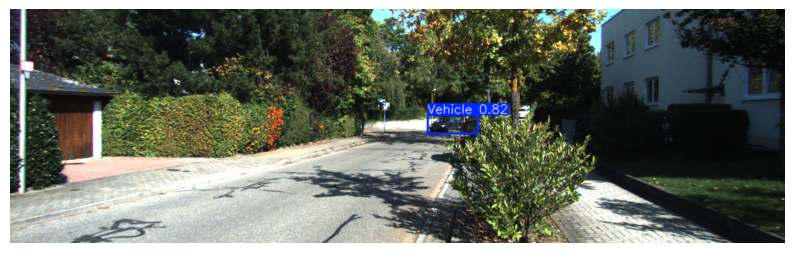

Object detected: Vehicle
Confidence: 0.82
Bounding box coordinates: xmin=669.37, ymin=169.10, xmax=749.27, ymax=199.09


In [10]:
%matplotlib inline

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load the final model
yolo_model = YOLO("../results/YOLOv8n/models/yolov8n_20240821_134739.pt")

# Path to the custom image
image_path = images_test_path / "000000.png"

# Make predictions and get results
results = yolo_model(image_path)

# Display the results
for result in results:
    # Annotate the image with bounding boxes
    img_with_boxes = result.plot()  # Annotate the image
    
    # Convert BGR to RGB for displaying with matplotlib
    img_rgb_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb_with_boxes)
    plt.axis('off')  # Hide axes
    plt.show()
    
    # Print details for each detected object
    for detection in result.boxes:
        class_id = int(detection.cls[0])  # Extract class ID
        confidence = detection.conf[0].item()  # Extract confidence score
        
        # Extract bounding box coordinates
        xmin, ymin, xmax, ymax = detection.xyxy[0].tolist()
        
        # Convert class ID to class name if necessary
        class_name = yolo_model.names[class_id]
        
        print(f"Object detected: {class_name}")
        print(f"Confidence: {confidence:.2f}")
        print(f"Bounding box coordinates: xmin={xmin:.2f}, ymin={ymin:.2f}, xmax={xmax:.2f}, ymax={ymax:.2f}")
        print("="*50)

In [ ]:
from ultralytics import YOLO
import cv2

# Load the final model
# model = YOLO("../models/yolov8_trained_v1_20240821_134739.pt")
model = YOLO("yolov8n.pt")

# Path to the input video
video_path = dataset_path / "test" / 'input_video.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Make predictions
    results = model(frame)
    
    # Process each result
    for result in results:
        # Draw bounding boxes on the frame
        annotated_frame = result.plot()  # Annotate the frame with bounding boxes
        
        # Display the result in a new OpenCV window
        cv2.imshow('Video Detection', annotated_frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


image 1/1 C:\Users\Ryuga\Desktop\Collision Avoidance\Collision-Avoidance\notebooks\..\dataset\train\images\000000.png: 224x640 1 Pedestrian, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)


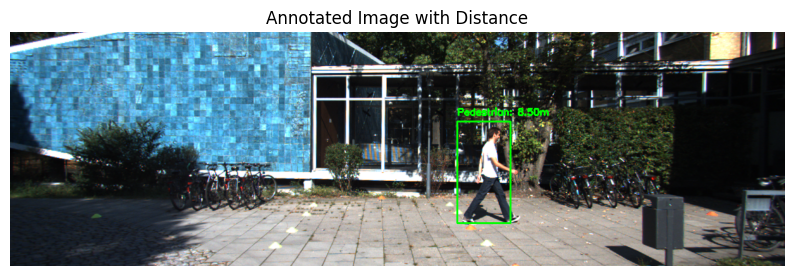

In [22]:
%matplotlib inline

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from joblib import load
import numpy as np

# Load the RandomForestRegressor model
distance_model = load('random_forest_model.joblib')

# Load the YOLO model
yolo_model = YOLO("../results/YOLOv8n/models/yolov8n_20240821_134739.pt")

# Path to the custom image
image_path = images_train_path / "000000.png"

# Read the image and convert it to RGB
img_rgb = cv2.imread(str(image_path))
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Make predictions and get results
results = yolo_model(image_path)

# Create a copy of the image to draw annotations
img_annotated = img_rgb.copy()

# Annotate and draw distances on the image
for result in results:
    for detection in result.boxes:
        class_id = int(detection.cls[0])  # Extract class ID
        confidence = detection.conf[0].item()  # Extract confidence score
        
        # Extract bounding box coordinates
        bbox = detection.xyxy[0].tolist()  # [xmin, ymin, xmax, ymax]
        xmin, ymin, xmax, ymax = bbox
        
        # Extract features for distance estimation
        bbox_features = np.array([xmin, ymin, xmax, ymax]).reshape(1, -1)
        
        # Predict the distance using the regression model
        predicted_distance = distance_model.predict(bbox_features)[0]
        
        # Convert class ID to class name if necessary
        class_name = yolo_model.names[class_id]
        
        # Draw bounding box and distance on the image
        cv2.rectangle(img_annotated, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
        cv2.putText(img_annotated, f'{class_name}: {predicted_distance:.2f}m', 
                    (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(img_annotated)
plt.axis('off')
plt.title('Annotated Image with Distance')
plt.show()

In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np
from joblib import load
import matplotlib.pyplot as plt

# Load the RandomForestRegressor model
distance_model = load('random_forest_model.joblib')

# Load the YOLO model
yolo_model = YOLO("../results/YOLOv8n/models/yolov8n_20240821_134739.pt")

# Path to the input and output video
input_video_path = dataset_path / "test" / 'input_video.mp4'
output_video_path = 'output_video.mp4'

# Open the input video
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or use 'XVID' for .avi files
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Make predictions and get results
    results = yolo_model(frame)

    # Create a copy of the frame to draw annotations
    img_annotated = img_rgb.copy()

    # Annotate and draw distances on the frame
    for result in results:
        for detection in result.boxes:
            class_id = int(detection.cls[0])  # Extract class ID
            confidence = detection.conf[0].item()  # Extract confidence score
            
            # Extract bounding box coordinates
            bbox = detection.xyxy[0].tolist()  # [xmin, ymin, xmax, ymax]
            xmin, ymin, xmax, ymax = bbox
            
            # Extract features for distance estimation
            bbox_features = np.array([xmin, ymin, xmax, ymax]).reshape(1, -1)
            
            # Predict the distance using the regression model
            predicted_distance = distance_model.predict(bbox_features)[0]
            
            # Convert class ID to class name if necessary
            class_name = yolo_model.names[class_id]
            
            # Draw bounding box and distance on the frame
            cv2.rectangle(img_annotated, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            cv2.putText(img_annotated, f'{class_name}: {predicted_distance:.2f}m', 
                        (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the annotated frame to the output video
    out.write(cv2.cvtColor(img_annotated, cv2.COLOR_RGB2BGR))

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

print('Processing complete. Output video saved as', output_video_path)


0: 384x640 7 Vehicles, 120.0ms
Speed: 6.1ms preprocess, 120.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 Vehicles, 31.2ms
Speed: 2.3ms preprocess, 31.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 Vehicles, 27.1ms
Speed: 3.8ms preprocess, 27.1ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 Vehicles, 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 Vehicles, 31.0ms
Speed: 3.3ms preprocess, 31.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 Vehicles, 32.6ms
Speed: 1.7ms preprocess, 32.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 Vehicles, 25.7ms
Speed: 7.5ms preprocess, 25.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 Vehicles, 1 DontCare, 18.6ms
Speed: 1.6ms preprocess, 18.6ms inference, 5.7ms postproces

In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np
from joblib import load

# Load the RandomForestRegressor model
distance_model = load('random_forest_model.joblib')

# Load the YOLO model
yolo_model = YOLO("../results/YOLOv8n/models/yolov8n_20240821_134739.pt")

# Path to the input video
input_video_path = 'input_video.mp4'

# Open the input video
cap = cv2.VideoCapture(input_video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Make predictions and get results
    results = yolo_model(frame)

    # Create a copy of the frame to draw annotations
    img_annotated = img_rgb.copy()

    # Annotate and draw distances on the frame
    for result in results:
        for detection in result.boxes:
            class_id = int(detection.cls[0])  # Extract class ID
            confidence = detection.conf[0].item()  # Extract confidence score
            
            # Extract bounding box coordinates
            bbox = detection.xyxy[0].tolist()  # [xmin, ymin, xmax, ymax]
            xmin, ymin, xmax, ymax = bbox
            
            # Extract features for distance estimation
            bbox_features = np.array([xmin, ymin, xmax, ymax]).reshape(1, -1)
            
            # Predict the distance using the regression model
            predicted_distance = distance_model.predict(bbox_features)[0]
            
            # Convert class ID to class name if necessary
            class_name = yolo_model.names[class_id]
            
            # Draw bounding box and distance on the frame
            cv2.rectangle(img_annotated, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            cv2.putText(img_annotated, f'{class_name}: {predicted_distance:.2f}m', 
                        (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the annotated frame
    cv2.imshow('Annotated Video', cv2.cvtColor(img_annotated, cv2.COLOR_RGB2BGR))

    # Exit loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()